In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!pip install geocoder
import geocoder

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### Gathering Data

In [2]:
url= 'https://en.wikipedia.org/wiki/List_of_towns_in_Connecticut' 
df=pd.read_html(url, header=0)[1]

df.head()

,Number,Town,Designation,Dateestablished,Land area(square miles),Population(in 2010),Form ofgovernment,County,Council of Governments,Native Americanname
0,1.0,Andover,Town,1848,15.46,3303,Town meeting,Tolland County,Capitol Region,NaN
1,2.0,Ansonia,City,1889,6.03,19249,Mayor-council,New Haven County,Naugatuck Valley,NaN
2,3.0,Ashford,Town,1714,38.79,4100,Town meeting,Windham County,Northeast CT,NaN
3,4.0,Avon,Town,1830,23.12,18098,Council-manager,Hartford County,Capitol Region,NaN
4,5.0,Barkhamsted,Town,1779,36.22,3620,Town meeting,Litchfield County,Northwest Hills,NaN


#### Data Wrangling

In [3]:
df1=df.drop(['Native Americanname','Council of Governments','Dateestablished','Number'],axis=1)
df1=df1.dropna()
df1=df1.rename(columns= {'Population(in 2010)':'Population'})
print(df1.shape)
df1.head()

(169, 6)


,Town,Designation,Land area(square miles),Population,Form ofgovernment,County
0,Andover,Town,15.46,3303,Town meeting,Tolland County
1,Ansonia,City,6.03,19249,Mayor-council,New Haven County
2,Ashford,Town,38.79,4100,Town meeting,Windham County
3,Avon,Town,23.12,18098,Council-manager,Hartford County
4,Barkhamsted,Town,36.22,3620,Town meeting,Litchfield County


#### Getting Lattitudes and Longitudes using Geocoder

In [4]:
def get_coords(town):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, CT, USA'.format(town))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [6]:
# define a function to get coordinates
coordinates1 = [ get_coords(town) for town in df1["Town"].tolist()]


In [7]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
coordinates = pd.DataFrame(coordinates1, columns=['Latitude', 'Longitude'])
print(coordinates.shape)
coordinates.head()

(169, 2)


,Latitude,Longitude
0,41.74159,-72.38047
1,41.34317,-73.07875
2,41.86293,-72.18840
3,41.81088,-72.82965
4,41.91212,-72.98829


In [9]:
df_merge=pd.concat([df1,coordinates],axis=1)
print(df_merge.shape)
df_merge.head()

(169, 8)


,Town,Designation,Land area(square miles),Population,Form ofgovernment,County,Latitude,Longitude
0,Andover,Town,15.46,3303,Town meeting,Tolland County,41.74159,-72.38047
1,Ansonia,City,6.03,19249,Mayor-council,New Haven County,41.34317,-73.07875
2,Ashford,Town,38.79,4100,Town meeting,Windham County,41.86293,-72.18840
3,Avon,Town,23.12,18098,Council-manager,Hartford County,41.81088,-72.82965
4,Barkhamsted,Town,36.22,3620,Town meeting,Litchfield County,41.91212,-72.98829


In [12]:
# Top 50 towns with largest land area
Large_land_area = df_merge[['Town','Population','Latitude','Longitude','Land area(square miles)']].sort_values(['Land area(square miles)'], ascending=False).head(50)

Large_land_area

,Town,Population,Latitude,Longitude,Land area(square miles)
94,New Milford,28142,41.57871,-73.41375,61.59
168,Woodstock,7964,41.95623,-71.98144,60.54
124,Sharon,2782,41.88513,-73.47017,58.70
133,Stafford,12087,41.98679,-72.28626,57.96
96,Newtown,27560,41.41210,-73.30784,57.76
121,Salisbury,3741,41.98282,-73.42246,57.32
73,Litchfield,8466,41.74626,-73.18895,56.06
39,East Haddam,9126,41.45828,-72.46353,54.33
101,North Stonington,5297,41.45301,-71.90452,54.31
70,Lebanon,7308,41.64524,-72.20124,54.11


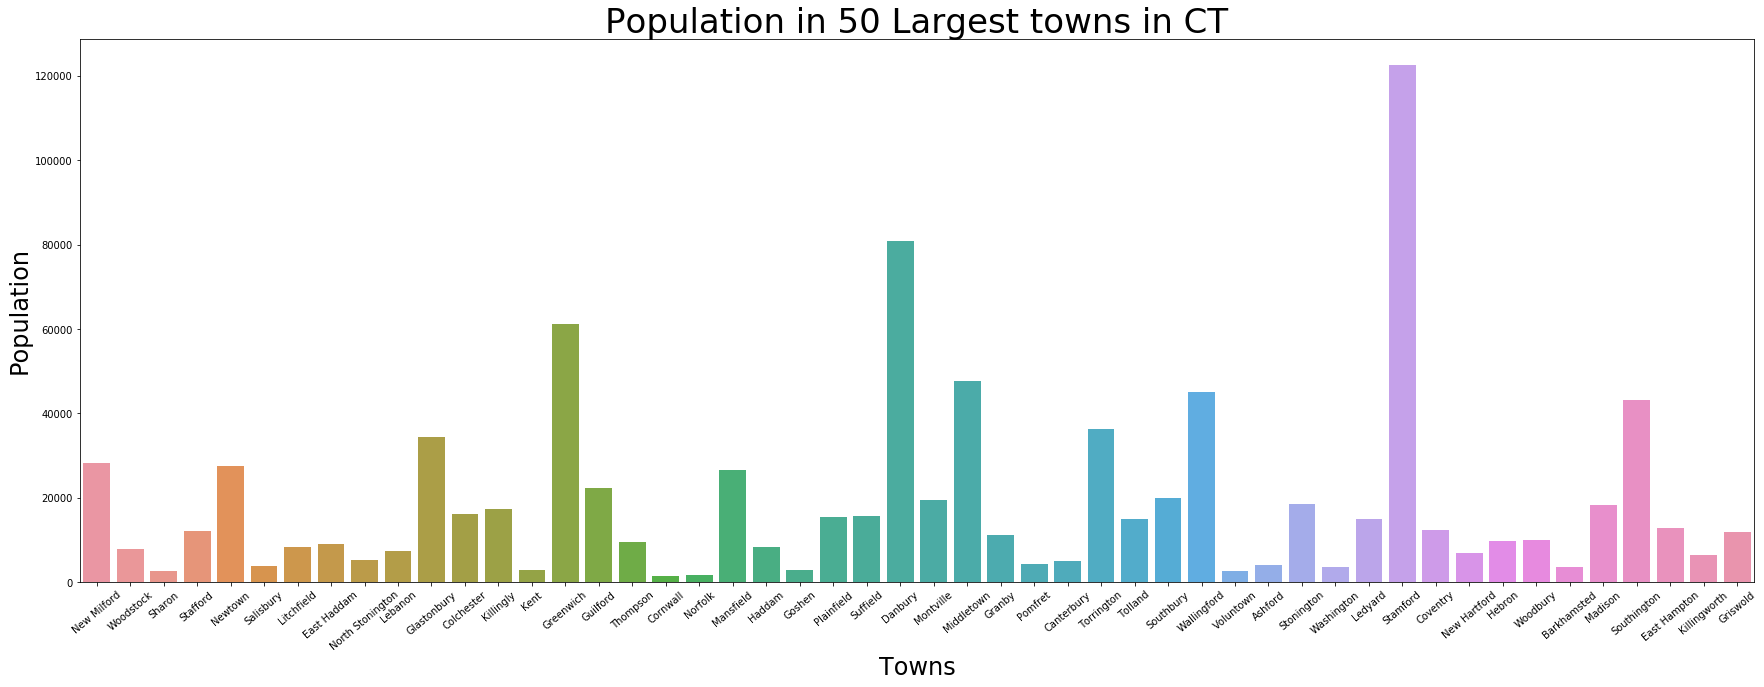

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(30,10))
bar = sns.barplot(x="Town", y="Population", data=Large_land_area)

bar.set_ylabel("Population", fontsize=24)
bar.set_xlabel("Towns", fontsize=24)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Population in 50 Largest towns in CT", fontsize=34)
plt.show()

Text(0.5, 1.0, 'Relation between Land area and Population')

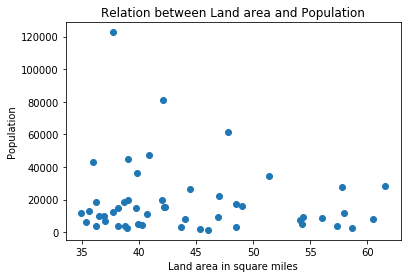

In [17]:
#Observe relation between Land area & Population
plt.scatter(x="Land area(square miles)", y="Population", data=Large_land_area)
plt.xlabel("Land area in square miles")
plt.ylabel("Population")
plt.title("Relation between Land area and Population")

In [18]:
address = 'Connecticut'

geolocator = Nominatim(user_agent="project")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Connecticut are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Connecticut are 41.6500201, -72.7342163.


In [221]:
# create map of CT using latitude and longitude values
map_ct = folium.Map(location=[latitude, longitude], zoom_start=9)

# add markers to map
for lat, lng, town, county in zip(df_merge['Latitude'], df_merge['Longitude'], df_merge['Town'], df_merge['County']):
    label = '{}, {}'.format(county, town)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ct)  
    
map_ct

In [20]:
CLIENT_ID = 'EKUTZ2JMI0BYEMW50CHXQDQQXCXU3MAZH05XW0FQTE1ZBCPL' # your Foursquare ID
CLIENT_SECRET = 'UWMYE0TO5D0REZHACPVKXFA3HWXEMAS31C4L1YM0IHQRL1WU' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EKUTZ2JMI0BYEMW50CHXQDQQXCXU3MAZH05XW0FQTE1ZBCPL
CLIENT_SECRET:UWMYE0TO5D0REZHACPVKXFA3HWXEMAS31C4L1YM0IHQRL1WU


In [21]:
LIMIT=100
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
       # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Town', 
                  'Town Latitude', 
                  'Town Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
ct_venues = getNearbyVenues(names=df_merge['Town'],
                                   latitudes=df_merge['Latitude'],
                                   longitudes=df_merge['Longitude']
                                  )
print(ct_venues.shape)
ct_venues.head()

(9527, 7)


,Town,Town Latitude,Town Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Andover,41.74159,-72.38047,Coventry Regional Farmers' Market,41.764425,-72.345684,Farmers Market
1,Andover,41.74159,-72.38047,SUBWAY,41.732848,-72.356542,Sandwich Place
2,Andover,41.74159,-72.38047,Shell,41.738511,-72.370681,Gas Station
3,Andover,41.74159,-72.38047,Andover Pizza,41.751940,-72.397950,Pizza Place
4,Andover,41.74159,-72.38047,Dunkin',41.732873,-72.356614,Donut Shop


In [23]:
cp=ct_venues
cp.head()

,Town,Town Latitude,Town Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Andover,41.74159,-72.38047,Coventry Regional Farmers' Market,41.764425,-72.345684,Farmers Market
1,Andover,41.74159,-72.38047,SUBWAY,41.732848,-72.356542,Sandwich Place
2,Andover,41.74159,-72.38047,Shell,41.738511,-72.370681,Gas Station
3,Andover,41.74159,-72.38047,Andover Pizza,41.751940,-72.397950,Pizza Place
4,Andover,41.74159,-72.38047,Dunkin',41.732873,-72.356614,Donut Shop


In [24]:
cp['Venue Category']

0                        Farmers Market
1                        Sandwich Place
2                           Gas Station
3                           Pizza Place
4                            Donut Shop
5                          Fishing Spot
6                                  Lake
7                                 Trail
8                            Food Truck
9                           Pizza Place
10                          Yoga Studio
11                   Spanish Restaurant
12                               Bakery
13                    Convenience Store
14                     Sushi Restaurant
15                                  Bar
16                              Brewery
17                       Sandwich Place
18                      Warehouse Store
19               Furniture / Home Store
20                   Italian Restaurant
21                            BBQ Joint
22                     Department Store
23                 Gym / Fitness Center
24                        Grocery Store


In [25]:
print('There are {} uniques categories.'.format(len(cp['Venue Category'].unique())))

There are 361 uniques categories.


#### Filtering Venues of Interest

In [26]:
ct_venues=ct_venues[(ct_venues['Venue Category'].str.contains('Athletics & Sports',regex=False))| (ct_venues['Venue Category'].str.contains('Campground',regex=False))|(ct_venues['Venue Category'].str.contains('Cycle Studio',regex=False))| (ct_venues['Venue Category'].str.contains('Dance Studio',regex=False))|(ct_venues['Venue Category'].str.contains('Fair',regex=False))| (ct_venues['Venue Category'].str.contains('Farmers Market',regex=False))|(ct_venues['Venue Category'].str.contains('Gym',regex=False))| (ct_venues['Venue Category'].str.contains('Gym / Fitess Center',regex=False))|(ct_venues['Venue Category'].str.contains('Gym Pool',regex=False))| (ct_venues['Venue Category'].str.contains('Gymnastics Gym',regex=False))|(ct_venues['Venue Category'].str.contains('Harbor / Marina',regex=False))|(ct_venues['Venue Category'].str.contains('Lake',regex=False))| (ct_venues['Venue Category'].str.contains('Monument / Landmark',regex=False))|(ct_venues['Venue Category'].str.contains('Paintball Field',regex=False))| (ct_venues['Venue Category'].str.contains('Park',regex=False))|(ct_venues['Venue Category'].str.contains('Playground',regex=False))| (ct_venues['Venue Category'].str.contains('River',regex=False))|(ct_venues['Venue Category'].str.contains('State / Provincial Park',regex=False))| (ct_venues['Venue Category'].str.contains('Theme Park Ride / Attraction',regex=False))|(ct_venues['Venue Category'].str.contains('Trail',regex=False))| (ct_venues['Venue Category'].str.contains('Yoga Studio',regex=False))]

print(ct_venues.shape)
ct_venues

(804, 7)


,Town,Town Latitude,Town Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Andover,41.74159,-72.38047,Coventry Regional Farmers' Market,41.764425,-72.345684,Farmers Market
6,Andover,41.74159,-72.38047,Andover Lake,41.721114,-72.357118,Lake
7,Andover,41.74159,-72.38047,Nathan Hale State Forest,41.764232,-72.345591,Trail
10,Andover,41.74159,-72.38047,Flower of Life Yoga,41.744352,-72.321890,Yoga Studio
23,Ansonia,41.34317,-73.07875,Planet Fitness,41.331161,-73.084458,Gym / Fitness Center
25,Ansonia,41.34317,-73.07875,Riverwalk Park,41.316208,-73.090029,Park
55,Ansonia,41.34317,-73.07875,The Edge Fitness Club,41.313558,-73.055713,Gym
86,Ansonia,41.34317,-73.07875,Indian Well State Park,41.342665,-73.127317,State / Provincial Park
102,Ansonia,41.34317,-73.07875,Woods,41.359297,-73.063059,Trail
106,Ansonia,41.34317,-73.07875,Paugussett Trail,41.343484,-73.126746,Trail


In [27]:
ct_venues.groupby(["Town","Venue Category"]).count()

Town Latitude  Town Longitude  \
Town             Venue Category                                                
Andover          Farmers Market                            1               1   
                 Lake                                      1               1   
                 Trail                                     1               1   
                 Yoga Studio                               1               1   
Ansonia          Gym                                       1               1   
                 Gym / Fitness Center                      1               1   
                 Park                                      1               1   
                 State / Provincial Park                   1               1   
                 Theme Park                                1               1   
                 Trail                                     2               2   
Ashford          Campground                                3               3   
Avon             Athletics & Sports                        1               1   
                 Gym                                       1               1   
                 Gym / Fitness Center                      2               2   
                 Park                                      3               3   
                 State / Provincial Park                   1               1   
                 Trail                                     6               6   
Barkhamsted      Lake                                      2               2   
                 Park                                      2               2   
                 Trail                                     3               3   
Beacon Falls     Gym / Fitness Center                      1               1   
                 Park                                      1               1   
Berlin           Gym                                       2               2   
                 Gym / Fitness Center                      2               2   
                 Trail                                     1               1   
Bethany          Park                                      1               1   
Bethel           Farmers Market                            2               2   
                 Gym / Fitness Center                      3               3   
                 Park                                      3               3   
Bethlehem        Theme Park                                1               1   
                 Trail                                     1               1   
Bloomfield       Gym                                       1               1   
                 Park                                      1               1   
                 Trail                                     2               2   
Bolton           Dance Studio                              1               1   
                 Harbor / Marina                           1               1   
                 Lake                                      1               1   
                 State / Provincial Park                   1               1   
                 Trail                                     4               4   
Bozrah           Campground                                2               2   
                 Farmers Market                            1               1   
                 Gym / Fitness Center                      1               1   
                 Yoga Studio                               1               1   
Branford         Gym                                       2               2   
                 Gym / Fitness Center                      3               3   
                 Park                                      4               4   
Bridgeport       Harbor / Marina                           1               1   
                 Park                                      2               2   
Bridgewater      Gym                           

In [29]:
rec_venues=ct_venues.groupby(["Town"]).count()
rec_venues=rec_venues.drop(["Town Latitude","Town Longitude","Venue", "Venue Latitude","Venue Longitude"],axis=1)
rec_venues.shape

(162, 1)

#### List of towns with more than 5 Venues of Interest

In [30]:
rec_venues=rec_venues.sort_values(by=['Venue Category'],ascending=False)
rec_venues.head(50)

,Venue Category
Town,
Avon,14
Bristol,13
Trumbull,12
Stamford,12
Hamden,11
Simsbury,10
Old Lyme,10
East Hartford,10
West Haven,10


In [31]:
comb_data=pd.merge(rec_venues,df_merge,on='Town',how='outer')

comb_data=comb_data.dropna()
print(comb_data.shape)
comb_data.head()

(162, 9)


,Town,Venue Category,Designation,Land area(square miles),Population,Form ofgovernment,County,Latitude,Longitude
0,Avon,14.0,Town,23.12,18098,Council-manager,Hartford County,41.81088,-72.82965
1,Bristol,13.0,City,26.51,60477,Mayor-council,Hartford County,41.67548,-72.94652
2,Trumbull,12.0,Town,23.29,36018,Mayor-council,Fairfield County,41.23495,-73.21967
3,Stamford,12.0,City,37.75,122643,Mayor-council,Fairfield County,41.05195,-73.54222
4,Hamden,11.0,Town,32.78,60960,Mayor-council,New Haven County,41.38423,-72.90161


In [37]:
req_data=comb_data[['Town','Population','Latitude','Longitude','Land area(square miles)','Venue Category']].sort_values(['Venue Category'], ascending=False).head(63)
req_data

,Town,Population,Latitude,Longitude,Land area(square miles),Venue Category
0,Avon,18098,41.81088,-72.82965,23.12,14.0
1,Bristol,60477,41.67548,-72.94652,26.51,13.0
2,Trumbull,36018,41.23495,-73.21967,23.29,12.0
3,Stamford,122643,41.05195,-73.54222,37.75,12.0
4,Hamden,60960,41.38423,-72.90161,32.78,11.0
5,Simsbury,23511,41.88046,-72.80000,33.88,10.0
6,Old Lyme,7603,41.32391,-72.33397,23.10,10.0
7,East Hartford,51252,41.76897,-72.64401,18.02,10.0
8,West Haven,55564,41.27228,-72.94998,10.84,10.0
14,Guilford,22375,41.28424,-72.68142,47.05,9.0


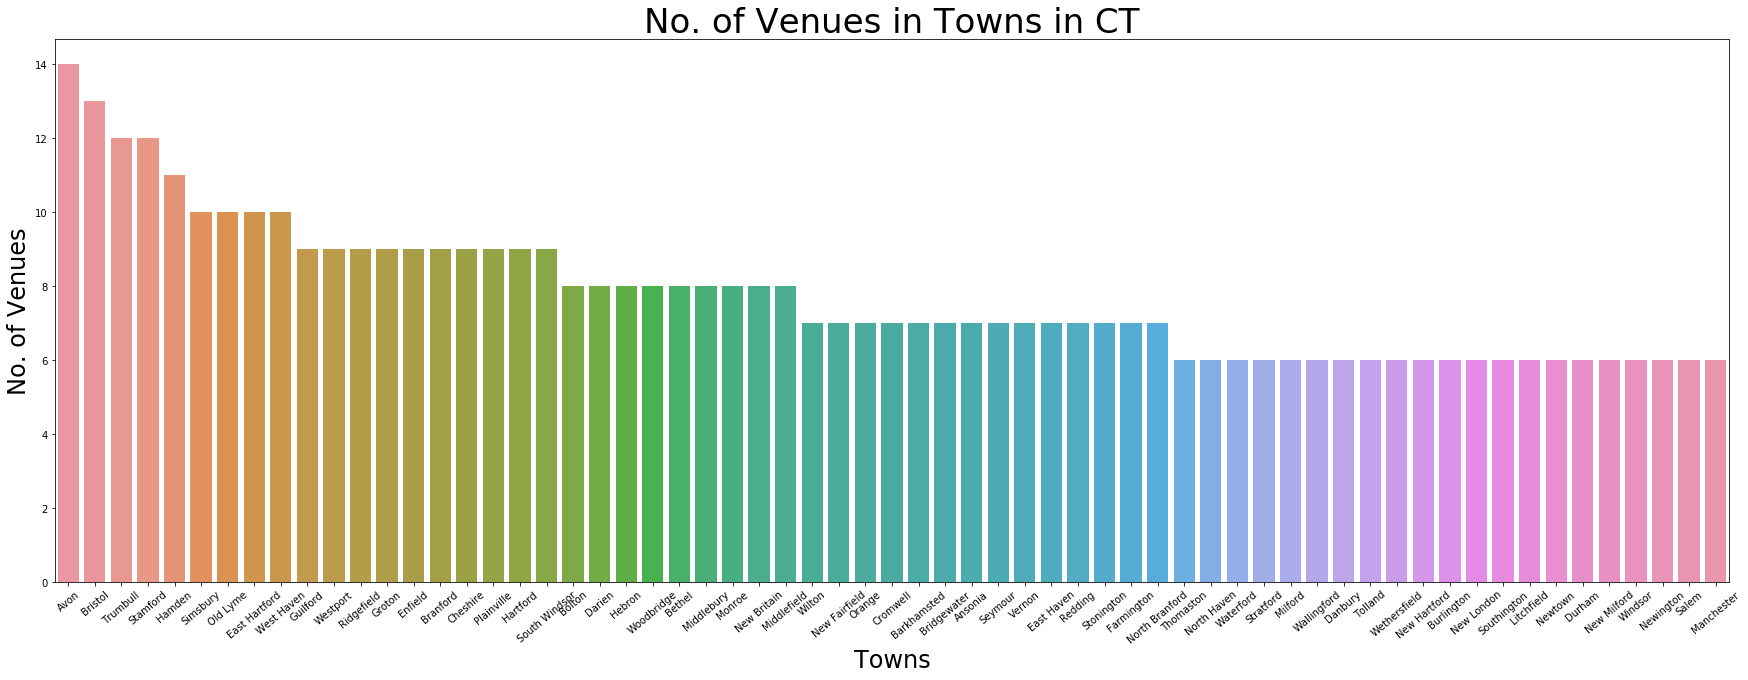

In [216]:
fig = plt.figure(figsize=(30,10))
bar = sns.barplot(x="Town", y="Venue Category", data=req_data)

bar.set_ylabel("No. of Venues", fontsize=24)
bar.set_xlabel("Towns", fontsize=24)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("No. of Venues in Towns in CT", fontsize=34)
plt.show()

In [48]:
# one hot encoding
ct_onehot = pd.get_dummies(ct_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ct_onehot['Town'] = ct_venues['Town'] 

# move neighborhood column to the first column
fixed_columns = [ct_onehot.columns[-1]] + list(ct_onehot.columns[:-1])
ct_onehot = ct_onehot[fixed_columns]

ct_onehot.head()

,Town,Athletics & Sports,Boxing Gym,Campground,College Gym,Cycle Studio,Dance Studio,Fair,Farmers Market,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Lake,Monument / Landmark,National Park,Outdoor Gym,Paintball Field,Park,Parking,Playground,RV Park,River,Skate Park,State / Provincial Park,Theme Park,Theme Park Ride / Attraction,Trail,Yoga Studio
0,Andover,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Andover,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Andover,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10,Andover,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
23,Ansonia,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
ct_grouped = ct_onehot.groupby('Town').mean().reset_index()
ct_grouped.head()

,Town,Athletics & Sports,Boxing Gym,Campground,College Gym,Cycle Studio,Dance Studio,Fair,Farmers Market,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Lake,Monument / Landmark,National Park,Outdoor Gym,Paintball Field,Park,Parking,Playground,RV Park,River,Skate Park,State / Provincial Park,Theme Park,Theme Park Ride / Attraction,Trail,Yoga Studio
0,Andover,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.000000,0.000000,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.250000,0.25
1,Ansonia,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.142857,0.142857,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.142857,0.142857,0.0,0.285714,0.00
2,Ashford,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00
3,Avon,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.071429,0.142857,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.214286,0.0,0.0,0.0,0.0,0.0,0.071429,0.000000,0.0,0.428571,0.00
4,Barkhamsted,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.285714,0.0,0.0,0.0,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.428571,0.00


In [50]:
num_top_venues = 5

for hood in ct_grouped['Town']:
    print("----"+hood+"----")
    temp = ct_grouped[ct_grouped['Town'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Andover----
            venue  freq
0     Yoga Studio  0.25
1           Trail  0.25
2  Farmers Market  0.25
3            Lake  0.25
4     Outdoor Gym  0.00


----Ansonia----
                     venue  freq
0                    Trail  0.29
1               Theme Park  0.14
2  State / Provincial Park  0.14
3                      Gym  0.14
4     Gym / Fitness Center  0.14


----Ashford----
                          venue  freq
0                    Campground   1.0
1            Athletics & Sports   0.0
2                 National Park   0.0
3                         Trail   0.0
4  Theme Park Ride / Attraction   0.0


----Avon----
                     venue  freq
0                    Trail  0.43
1                     Park  0.21
2     Gym / Fitness Center  0.14
3       Athletics & Sports  0.07
4  State / Provincial Park  0.07


----Barkhamsted----
                venue  freq
0               Trail  0.43
1                Park  0.29
2                Lake  0.29
3  Athletics & Sports  0.00
4  

In [51]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [52]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Town']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
town_venues_sorted = pd.DataFrame(columns=columns)
town_venues_sorted['Town'] = ct_grouped['Town']

for ind in np.arange(ct_grouped.shape[0]):
    town_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ct_grouped.iloc[ind, :], num_top_venues)

town_venues_sorted.head()


,Town,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Andover,Yoga Studio,Lake,Farmers Market,Trail,Boxing Gym
1,Ansonia,Trail,Theme Park,State / Provincial Park,Park,Gym
2,Ashford,Campground,Yoga Studio,Lake,Boxing Gym,College Gym
3,Avon,Trail,Park,Gym / Fitness Center,Athletics & Sports,State / Provincial Park
4,Barkhamsted,Trail,Park,Lake,Yoga Studio,Harbor / Marina


In [55]:
ct_grouped_clustering = ct_grouped.drop('Town', 1)
ct_grouped_clustering

,Athletics & Sports,Boxing Gym,Campground,College Gym,Cycle Studio,Dance Studio,Fair,Farmers Market,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Lake,Monument / Landmark,National Park,Outdoor Gym,Paintball Field,Park,Parking,Playground,RV Park,River,Skate Park,State / Provincial Park,Theme Park,Theme Park Ride / Attraction,Trail,Yoga Studio
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.250000,0.250000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.142857,0.0,0.000000,0.0,0.000000,0.000,0.142857,0.142857,0.000000,0.285714,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.214286,0.0,0.000000,0.0,0.000000,0.000,0.071429,0.000000,0.000000,0.428571,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.0,0.285714,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.428571,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.500000,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.200000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.375000,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.500000,0.000000,0.500000,0.000000


#### Finding suitable value of 'k' 

In [61]:
from sklearn import metrics
from scipy.spatial.distance import cdist

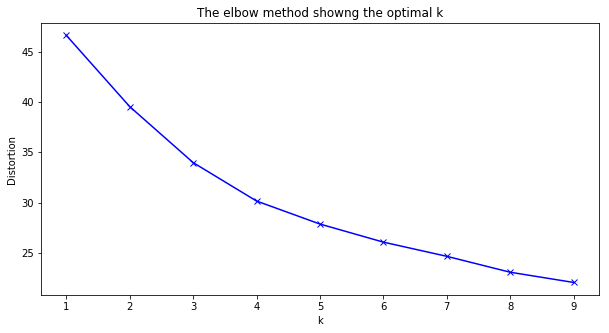

In [85]:
%matplotlib inline

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(ct_grouped_clustering)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(10,5))
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The elbow method showng the optimal k')
plt.plot(K, distortions, 'bx-')
plt.show()

In [86]:
# set number of clusters
kclusters = 5

ct_grouped_clustering = ct_grouped.drop('Town',1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ct_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 2, 1, 1, 0, 4, 3, 0, 1], dtype=int32)

In [116]:
# add clustering labels
town_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ct_merged = ct_venues

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
ct_merged = ct_merged.join(town_venues_sorted.set_index('Town'), on='Town')
ct_merged = ct_merged.rename(columns={'Venue Category':'VenueCategory'})
ct_merged.head() # check the last columns!

,Town,Town Latitude,Town Longitude,Venue,Venue Latitude,Venue Longitude,VenueCategory,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Andover,41.74159,-72.38047,Coventry Regional Farmers' Market,41.764425,-72.345684,Farmers Market,2,Yoga Studio,Lake,Farmers Market,Trail,Boxing Gym
6,Andover,41.74159,-72.38047,Andover Lake,41.721114,-72.357118,Lake,2,Yoga Studio,Lake,Farmers Market,Trail,Boxing Gym
7,Andover,41.74159,-72.38047,Nathan Hale State Forest,41.764232,-72.345591,Trail,2,Yoga Studio,Lake,Farmers Market,Trail,Boxing Gym
10,Andover,41.74159,-72.38047,Flower of Life Yoga,41.744352,-72.321890,Yoga Studio,2,Yoga Studio,Lake,Farmers Market,Trail,Boxing Gym
23,Ansonia,41.34317,-73.07875,Planet Fitness,41.331161,-73.084458,Gym / Fitness Center,1,Trail,Theme Park,State / Provincial Park,Park,Gym


#### Cluster Visualization

In [88]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ct_merged['Town Latitude'], ct_merged['Town Longitude'], ct_merged['Town'], ct_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [117]:
cluster0= ct_merged.loc[ct_merged['Cluster Labels'] == 0, ct_merged.columns[[0] + list(range(5, ct_merged.shape[1]))]]
#cluster0=cluster0.rename(columns={'Venue Category':'VenueCategory'})
cluster0

,Town,Venue Longitude,VenueCategory,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
290,Beacon Falls,-73.022083,Gym / Fitness Center,0,Park,Gym / Fitness Center,Yoga Studio,Lake,Boxing Gym
302,Beacon Falls,-73.036196,Park,0,Park,Gym / Fitness Center,Yoga Studio,Lake,Boxing Gym
440,Bethel,-73.379302,Farmers Market,0,Park,Gym / Fitness Center,Farmers Market,Yoga Studio,Lake
446,Bethel,-73.412304,Gym / Fitness Center,0,Park,Gym / Fitness Center,Farmers Market,Yoga Studio,Lake
447,Bethel,-73.441521,Park,0,Park,Gym / Fitness Center,Farmers Market,Yoga Studio,Lake
458,Bethel,-73.453553,Park,0,Park,Gym / Fitness Center,Farmers Market,Yoga Studio,Lake
481,Bethel,-73.452006,Park,0,Park,Gym / Fitness Center,Farmers Market,Yoga Studio,Lake
489,Bethel,-73.421274,Gym / Fitness Center,0,Park,Gym / Fitness Center,Farmers Market,Yoga Studio,Lake
509,Bethel,-73.382811,Farmers Market,0,Park,Gym / Fitness Center,Farmers Market,Yoga Studio,Lake
511,Bethel,-73.390828,Gym / Fitness Center,0,Park,Gym / Fitness Center,Farmers Market,Yoga Studio,Lake


### First Cluster: Cluster0

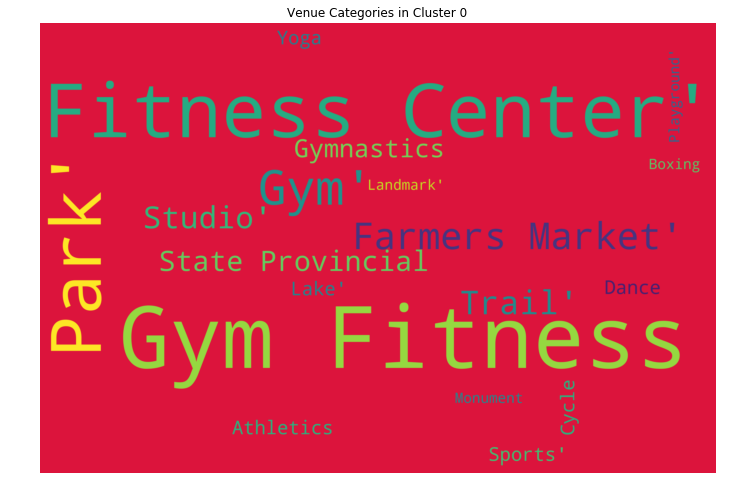

In [217]:
# install wordcloud
#!conda install -c conda-forge wordcloud==1.4.1 --yes

from wordcloud import WordCloud, STOPWORDS

text=cluster0.VenueCategory.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'crimson',
    stopwords = STOPWORDS).generate(str(text))
fig=plt.figure(figsize = (10,8),)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Venue Categories in Cluster 0')
plt.tight_layout(pad=0)
plt.show()

In [208]:
cluster0_towns = pd.DataFrame(cluster0.Town.unique())
print("Total number of unique Towns in cluster 0:", cluster0_towns.shape)
cluster0_towns= cluster0_towns.rename(columns={0:'Towns_C0'})

Total number of unique Towns in cluster 0: (25, 1)


### Second Cluster: Cluster1

In [144]:
cluster1=ct_merged.loc[ct_merged['Cluster Labels'] == 1, ct_merged.columns[[0] + list(range(6, ct_merged.shape[1]))]]
cluster1

,Town,VenueCategory,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
23,Ansonia,Gym / Fitness Center,1,Trail,Theme Park,State / Provincial Park,Park,Gym
25,Ansonia,Park,1,Trail,Theme Park,State / Provincial Park,Park,Gym
55,Ansonia,Gym,1,Trail,Theme Park,State / Provincial Park,Park,Gym
86,Ansonia,State / Provincial Park,1,Trail,Theme Park,State / Provincial Park,Park,Gym
102,Ansonia,Trail,1,Trail,Theme Park,State / Provincial Park,Park,Gym
106,Ansonia,Trail,1,Trail,Theme Park,State / Provincial Park,Park,Gym
108,Ansonia,Theme Park,1,Trail,Theme Park,State / Provincial Park,Park,Gym
131,Avon,Park,1,Trail,Park,Gym / Fitness Center,Athletics & Sports,State / Provincial Park
138,Avon,Gym / Fitness Center,1,Trail,Park,Gym / Fitness Center,Athletics & Sports,State / Provincial Park
139,Avon,Gym / Fitness Center,1,Trail,Park,Gym / Fitness Center,Athletics & Sports,State / Provincial Park


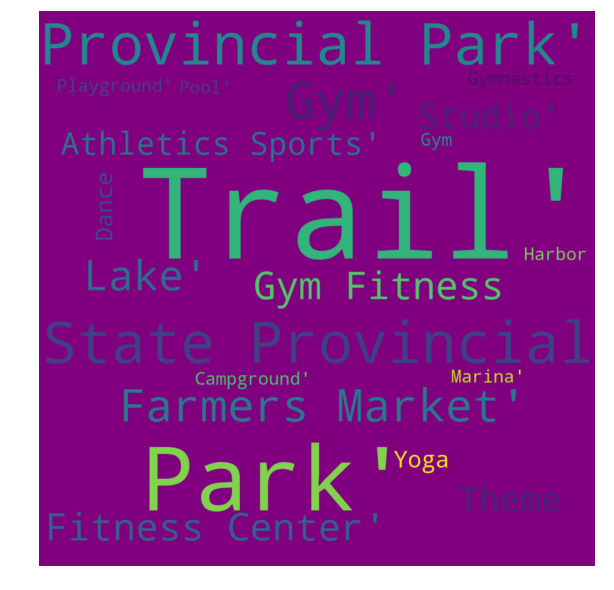

In [145]:
text=cluster1.VenueCategory.values
wordcloud = WordCloud(
    width = 1000,
    height = 1000,
    background_color = 'purple',
    stopwords = STOPWORDS).generate(str(text))
fig=plt.figure(figsize = (10,8),)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [210]:
cluster1_towns = pd.DataFrame(cluster1.Town.unique())
print("Total number of unique Towns in cluster 1:", cluster1_towns.shape)
cluster1_towns=cluster1_towns.rename(columns={0:'Towns_C1'})

Total number of unique Towns in cluster 1: (31, 1)


### Third Cluster: Cluster2

In [146]:
cluster2= ct_merged.loc[ct_merged['Cluster Labels'] == 2, ct_merged.columns[[0] + list(range(6, ct_merged.shape[1]))]]
cluster2

,Town,VenueCategory,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Andover,Farmers Market,2,Yoga Studio,Lake,Farmers Market,Trail,Boxing Gym
6,Andover,Lake,2,Yoga Studio,Lake,Farmers Market,Trail,Boxing Gym
7,Andover,Trail,2,Yoga Studio,Lake,Farmers Market,Trail,Boxing Gym
10,Andover,Yoga Studio,2,Yoga Studio,Lake,Farmers Market,Trail,Boxing Gym
119,Ashford,Campground,2,Campground,Yoga Studio,Lake,Boxing Gym,College Gym
120,Ashford,Campground,2,Campground,Yoga Studio,Lake,Boxing Gym,College Gym
122,Ashford,Campground,2,Campground,Yoga Studio,Lake,Boxing Gym,College Gym
611,Bozrah,Campground,2,Campground,Yoga Studio,Farmers Market,Gym / Fitness Center,Lake
615,Bozrah,Campground,2,Campground,Yoga Studio,Farmers Market,Gym / Fitness Center,Lake
626,Bozrah,Gym / Fitness Center,2,Campground,Yoga Studio,Farmers Market,Gym / Fitness Center,Lake


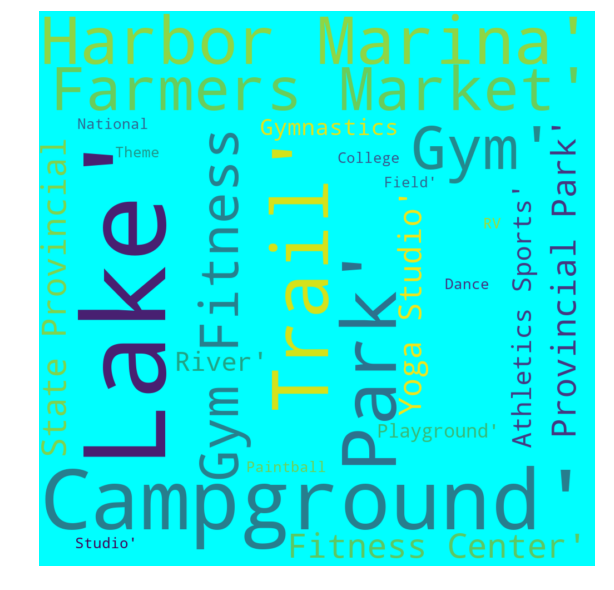

In [147]:
text=cluster2.VenueCategory.values
wordcloud = WordCloud(
    width = 1000,
    height = 1000,
    background_color = 'cyan',
    stopwords = STOPWORDS).generate(str(text))
fig=plt.figure(figsize = (10,8),)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [211]:
cluster2_towns = pd.DataFrame(cluster2.Town.unique())
print("Total number of unique Towns in cluster 2:", cluster2_towns.shape)
cluster2_towns= cluster2_towns.rename(columns={0:'Towns_C2'})

Total number of unique Towns in cluster 2: (33, 1)


### Fourth Cluster: Cluster3

In [148]:
cluster3= ct_merged.loc[ct_merged['Cluster Labels'] == 3, ct_merged.columns[[0] + list(range(6, ct_merged.shape[1]))]]
cluster3

,Town,VenueCategory,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
419,Bethany,Park,3,Park,Yoga Studio,Lake,Boxing Gym,Campground
756,Bridgeport,Park,3,Park,Harbor / Marina,Yoga Studio,Lake,Boxing Gym
780,Bridgeport,Harbor / Marina,3,Park,Harbor / Marina,Yoga Studio,Lake,Boxing Gym
807,Bridgeport,Park,3,Park,Harbor / Marina,Yoga Studio,Lake,Boxing Gym
841,Bridgewater,Park,3,Park,Trail,State / Provincial Park,Gym,Yoga Studio
843,Bridgewater,State / Provincial Park,3,Park,Trail,State / Provincial Park,Gym,Yoga Studio
845,Bridgewater,Gym,3,Park,Trail,State / Provincial Park,Gym,Yoga Studio
873,Bridgewater,Park,3,Park,Trail,State / Provincial Park,Gym,Yoga Studio
874,Bridgewater,Park,3,Park,Trail,State / Provincial Park,Gym,Yoga Studio
875,Bridgewater,Trail,3,Park,Trail,State / Provincial Park,Gym,Yoga Studio


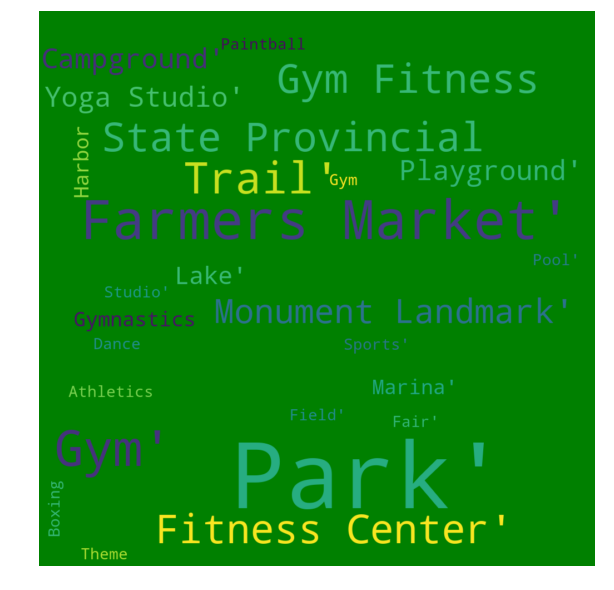

In [149]:
text=cluster3.VenueCategory.values
wordcloud = WordCloud(
    width = 1000,
    height = 1000,
    background_color = 'green',
    stopwords = STOPWORDS).generate(str(text))
fig=plt.figure(figsize = (10,8),)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [212]:
cluster3_towns = pd.DataFrame(cluster3.Town.unique())
print("Total number of unique Towns in cluster 3:", cluster3_towns.shape)
cluster3_towns= cluster3_towns.rename(columns={0:'Towns_C3'})

Total number of unique Towns in cluster 3: (37, 1)


### Fifth Cluster: Cluster4

In [150]:
cluster4= ct_merged.loc[ct_merged['Cluster Labels'] == 4, ct_merged.columns[[0] + list(range(6, ct_merged.shape[1]))]]
cluster4

,Town,VenueCategory,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
313,Berlin,Gym,4,Gym,Gym / Fitness Center,Trail,Yoga Studio,Lake
338,Berlin,Gym / Fitness Center,4,Gym,Gym / Fitness Center,Trail,Yoga Studio,Lake
355,Berlin,Gym,4,Gym,Gym / Fitness Center,Trail,Yoga Studio,Lake
375,Berlin,Gym / Fitness Center,4,Gym,Gym / Fitness Center,Trail,Yoga Studio,Lake
401,Berlin,Trail,4,Gym,Gym / Fitness Center,Trail,Yoga Studio,Lake
883,Bristol,Park,4,Theme Park Ride / Attraction,Park,Gym,Gymnastics Gym,Theme Park
884,Bristol,Park,4,Theme Park Ride / Attraction,Park,Gym,Gymnastics Gym,Theme Park
894,Bristol,Theme Park,4,Theme Park Ride / Attraction,Park,Gym,Gymnastics Gym,Theme Park
901,Bristol,Theme Park Ride / Attraction,4,Theme Park Ride / Attraction,Park,Gym,Gymnastics Gym,Theme Park
902,Bristol,Park,4,Theme Park Ride / Attraction,Park,Gym,Gymnastics Gym,Theme Park


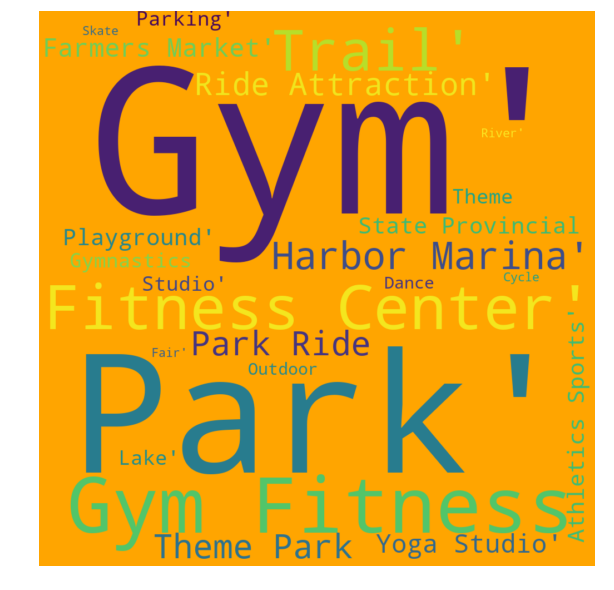

In [214]:
text=cluster4.VenueCategory.values
wordcloud = WordCloud(
    width = 1000,
    height = 1000,
    background_color = 'orange',
    stopwords = STOPWORDS).generate(str(text))
fig=plt.figure(figsize = (10,8),)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [206]:
cluster4_towns = pd.DataFrame(cluster4.Town.unique())
print("Total number of unique Towns in cluster 4:", cluster4_towns.shape)
cluster4_towns= cluster4_towns.rename(columns={0:'Towns_C4'})

Total number of unique Towns in cluster 4: (36, 1)


In [213]:
mergeClusters=pd.concat([cluster0_towns,cluster1_towns,cluster2_towns,cluster3_towns,cluster4_towns],axis=1)
mergeClusters

,Towns_C0,Towns_C1,Towns_C2,Towns_C3,Towns_C4
0,Beacon Falls,Ansonia,Andover,Bethany,Berlin
1,Bethel,Avon,Ashford,Bridgeport,Bristol
2,Branford,Barkhamsted,Bozrah,Bridgewater,Brookfield
3,Cromwell,Bethlehem,Canaan,Cheshire,Canton
4,Derby,Bloomfield,Chaplin,Colchester,Clinton
5,Farmington,Bolton,Chester,Danbury,Darien
6,Granby,Burlington,Columbia,Deep River,Durham
7,Griswold,Colebrook,Coventry,East Haven,East Hartford
8,Manchester,Cornwall,East Granby,Ellington,East Windsor
9,Meriden,Easton,East Haddam,Groton,Enfield
